**Title:** Neural Networks to boost prediction accuracy in the Pima indians dataset.

**Author:** Nyabuti Mainye

**Date:** 5/6/2017

### Introduction 
**Predictive analytics** is the practice of extracting information from existing data sets in order to determine patterns and predict future outcomes and trends.<sup>[1](http://www.webopedia.com/TERM/P/predictive_analytics.html)</sup> <sup>[2](https://gist.github.com/themiwi/5064046/revisions)</sup> It has a variety of applications in healthcare, credit scoring, recommendation systems like online newspapers and understanding shopping trends of customers.<sup>[3](http://www.predictiveanalyticsworld.com/businessapplications.php)</sup> On the other hand, these applications are possible by drawing from statistical techniques such as predictive modeling, machine learning and data mining.<sup>[4](https://en.wikipedia.org/wiki/Predictive_analytics)</sup> The dataset i will be using is the pima indians dataset. I will use the keras library - "it is a high level neural network API(Application programming interface), written in Python and capable of running on top of either TensorFlow or Theano."<sup>[6](https://keras.io)</sup> During the analysis i will use the **Specify-Compile-Fit-Predict** workflow as demonstrated in some examples[ here.](https://github.com/fchollet/keras/tree/master/examples) Let's proceed to the next section.

### Data:

Pima indians are native americans living in now central and southern Arizona in the United States of America.<sup>[7](https://en.wikipedia.org/wiki/Pima_people)</sup> However, this dataset consists of females at least 21 years old of the Pima Indian heritage.<sup>[8](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)</sup> Initially, it was used to forecast onset of diabetes mellitus Smith et al. (1988) using the ADAP learning algorithm. <sup>[9](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/)</sup> In my analysis, i will attempt to use the keras library neural network API(Application programming interface to try and get a higher accuracy than the one that was gotten during the initial study.

In line with scope of interest, is that given **predictor variables** namely: 
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years)

i will try to predict the **target variable** which has been convienently converted into (0 - doesn't have diabetes and 1 - the patient has diabetes. We will see this in the Exploratory Data analysis. This is rather similiar to machine learning, but, in deep learning that involves, neural networks there is representation of data to make conclusion.<sup>10</sup> Thus, there will be input layer, followed by an hidden layer and then the output layer. 




### Exploratory Data analysis:


In [1]:
# Let's start by importing the data 
# importing modules that we'll need for the analysis
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv") # importing our data into the notebook
print(df.head(5)) # Examine first columns
print ("") # spacing for better reading
print (df.columns) # All the columns, we'll work with, they are formatted correctly



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
# Examining row object of columns, and a doing some summary statistics
print (df.info())
# we have 9 columns and 768 rows
# Doesn't need additional cleaning for the column names they are consistent except BMI
# Since it's already an acronymn i suppose that was the best way to format it.
print ("")

print (df.describe())
# there's something wrong with some columns, i think they are missing values for some columns such as BloodPressure since
# there are zeros in the minimum BMI as well as Glucose,BloodPressure,SkinThickness and Insulin
# Let's count the number of these occurences and draw some plots.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000  

In [3]:
#print(df.BMI.value_counts()); print ("") # 11 missing BMI records
#print(df.Glucose.value_counts()); print ("") # 5 missing
#print(df.BloodPressure.value_counts()); print ("") # 35 missing records
#print(df.SkinThickness.value_counts()); print ("") # 227 missing records Not sure about this one.
#print(df.Insulin.value_counts()); print ("") # 374 missing records

# Saving up on space
# i've already indicated the answers to the number of missing values for some colums
# percentage of data missing

missing = 11 + 5 + 35 + 374 # adding up the missing value occurences
msg = "About {}% missing data points in the pima indians dataset if i'm not wrong."
print (msg.format(round(missing/768 * 100))) # finding the percentage of missing data on the columns.

# I'll use an imputation strategy in the workflow to deal with missing data

About 55% missing data points in the pima indians dataset if i'm not wrong.


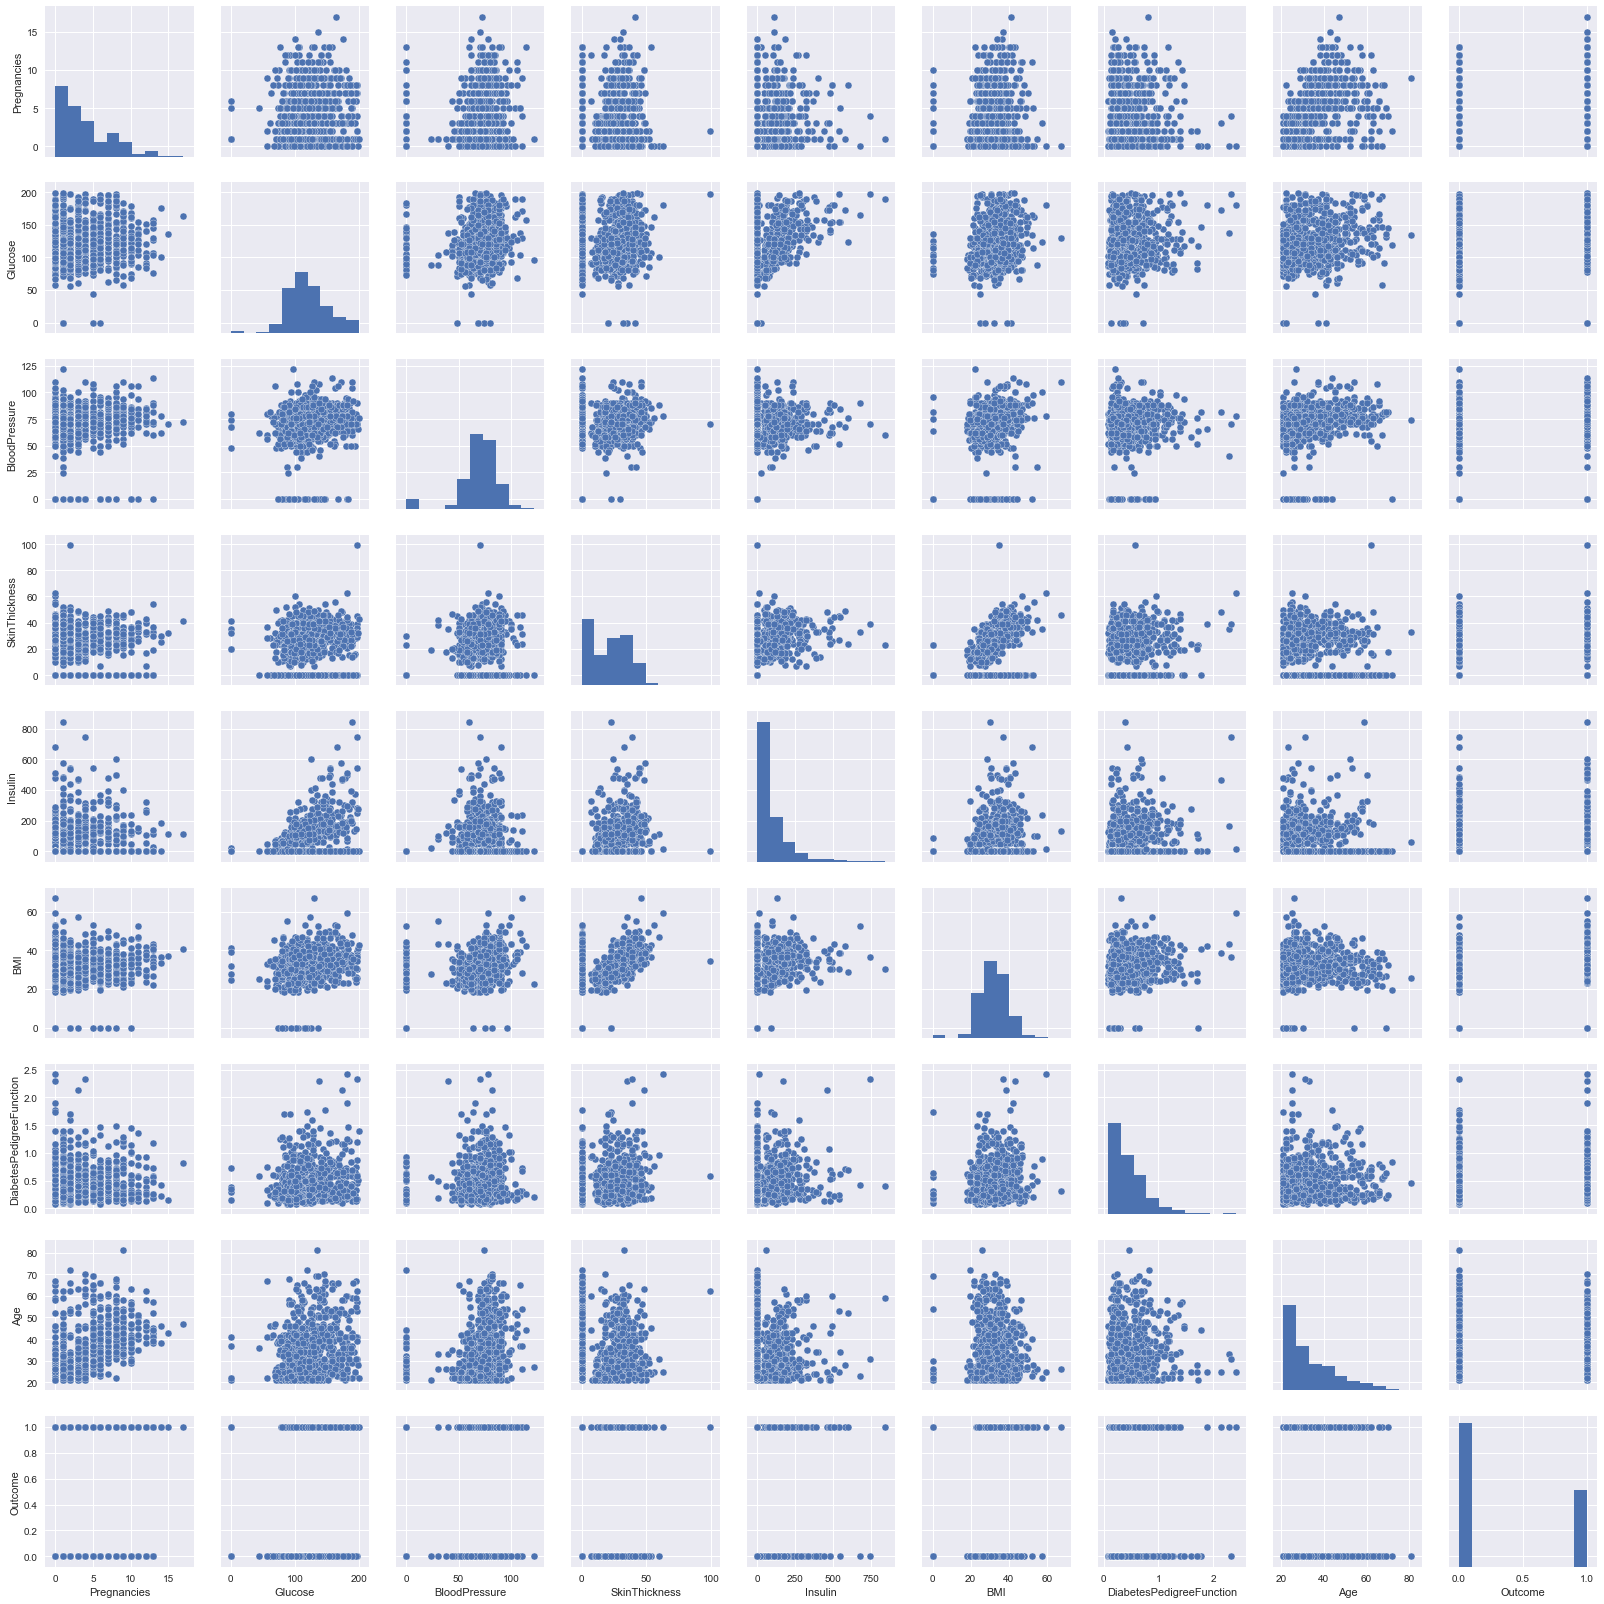

In [4]:
# exploratory visualisation to see if there is any correlation between columns
# since the columns are few, this plot is feasible i don't recommend it for many columns

# import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

#plt.title("Pairplot between the different columns of the dataset.")
sns.pairplot(df)

plt.show()


In [5]:
# some variables seem correlated. Let's try finding the pearson correlation coefficient for one.
# Let's try a correlation between Glucose column and Insulin
Glucoins = np.corrcoef(df.Insulin, df.Glucose)
print (Glucoins)
# that wasn't what i expected. O.3 is  really low positive correlation


[[ 1.          0.33135711]
 [ 0.33135711  1.        ]]


### Inference


In [6]:
# Converting the dataframe into a numpy matrix
# this is a necessary step to proceed with the analysis of the data set for the algorithm in the library to work 

target = df['Outcome'].values
predictors = df.drop('Outcome', axis = 1).values

print (target)
print (predictors)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [7]:
# first try with Keras
# Call the necessary modules
from keras.models import Sequential
from keras.layers import Dense

# Specify model architecture
model = Sequential()

# add first layer
model.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform',activation = 'relu')) # minus the target variable

# add second layer
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu')) 

# add an output layer
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')) 

# compile the model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the model
model.fit(predictors, target)


Using TensorFlow backend.


Epoch 1/10
768/768 [==============================] - 0s - loss: 0.6862 - acc: 0.6406     
Epoch 2/10
768/768 [==============================] - 0s - loss: 0.6674 - acc: 0.6510     
Epoch 3/10
768/768 [==============================] - 0s - loss: 0.6583 - acc: 0.6523     
Epoch 4/10
768/768 [==============================] - 0s - loss: 0.6547 - acc: 0.6562     
Epoch 5/10
768/768 [==============================] - 0s - loss: 0.6470 - acc: 0.6536     
Epoch 6/10
768/768 [==============================] - 0s - loss: 0.6407 - acc: 0.6654     
Epoch 7/10
768/768 [==============================] - 0s - loss: 0.6315 - acc: 0.6641     
Epoch 8/10
768/768 [==============================] - 0s - loss: 0.6265 - acc: 0.6654     
Epoch 9/10
768/768 [==============================] - 0s - loss: 0.6240 - acc: 0.6589     
Epoch 10/10
768/768 [==============================] - 0s - loss: 0.6139 - acc: 0.6732     


So far i'm seeing a reduction in the loss and increase in the accuracy -- this means the model can be improved with tuning. Next up, i'll do some model fine tuning by changing optimization parameters, adding an early stopping steps, experimenting with wider networks and adding layers to a network if necessary. According to the DL workflow i specified in the repository.

#### adding epochs and early stopping

In [8]:
from keras.callbacks import EarlyStopping

# Specify model architecture
model2 = Sequential()

# add first layer
model2.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform',activation = 'relu')) # minus the target variable

# add second layer
model2.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu')) 

# add an output layer
model2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')) 

# compile the model
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# adding the early stopping 
early_stopping_monitor = EarlyStopping(patience=2)

# fit the model and notice the addition arguments
# Fit the model
model2.fit(predictors, target, epochs = 30, validation_split = 0.2, callbacks = [early_stopping_monitor])


Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 0s - loss: 0.6909 - acc: 0.6156 - val_loss: 0.6877 - val_acc: 0.6429
Epoch 2/30
614/614 [==============================] - 0s - loss: 0.6812 - acc: 0.6531 - val_loss: 0.6754 - val_acc: 0.6429
Epoch 3/30
614/614 [==============================] - 0s - loss: 0.6699 - acc: 0.6531 - val_loss: 0.6701 - val_acc: 0.6429
Epoch 4/30
614/614 [==============================] - 0s - loss: 0.6633 - acc: 0.6531 - val_loss: 0.6696 - val_acc: 0.6429
Epoch 5/30
614/614 [==============================] - 0s - loss: 0.6599 - acc: 0.6531 - val_loss: 0.6675 - val_acc: 0.6429
Epoch 6/30
614/614 [==============================] - 0s - loss: 0.6572 - acc: 0.6531 - val_loss: 0.6671 - val_acc: 0.6429
Epoch 7/30
614/614 [==============================] - 0s - loss: 0.6511 - acc: 0.6531 - val_loss: 0.6635 - val_acc: 0.6429
Epoch 8/30
614/614 [==============================] - 0s - loss: 0.6460 - acc: 0.6547 - val_l

Abit of an improvement with increase of epochs. I'll try adding experimenting with wider networks and adding layers.

#### Changing optimization parameters

In [19]:
#from keras.optimizers import SGD
#n_cols = predictors.shape[1]
#input_shape = (n_cols,)

#def get_new_model(input_shape = input_shape):
    #model3 = Sequential()
    #model3.add(Dense(100, activation='relu', input_shape = input_shape))
    #model3.add(Dense(100, activation='relu'))
    #model3.add(Dense(2, activation='softmax'))
    #return model3

#lr_to_test = [.000001, 0.01, 1]
# loop over learning rates
#for lr in lr_to_test:
    #print('\n\nTesting model with learning rate: %f\n'%lr )
    #model = get_new_model()
    #my_optimizer = SGD(lr=lr)
    #model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    #model.fit(predictors, target)


In [18]:
#from keras.optimizers import Adam

#def get_new_model(input_shape = (n_cols,)):
    #model4 = Sequential()
    #model4.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform',activation = 'relu')) # minus the target variable
    #model4.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu')) 
    #model4.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')) 
    #return(model)

#lr_to_test = [.000001, 0.01, 1]
# loop over learning rates
#for lr in lr_to_test:
    #model = get_new_model()
    #my_optimizer = Adam(lr=lr)
    #model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    #model.fit(predictors, target)

### Conclusion:

### References:
1. http://www.webopedia.com/TERM/P/predictive_analytics.html retrieved on 02/06/17 at 11:07 A.M EAT
2. https://gist.github.com/themiwi/5064046/revisions retrieved on 02/06/17 at 11:07 A.M EAT
3. http://www.predictiveanalyticsworld.com/businessapplications.php retrieved on 02/06/17 at 11:07 A.M EAT
4. https://en.wikipedia.org/wiki/Predictive_analytics retrieved on 02/06/17 at 11:07 A.M EAT
5. Changing text colour https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook retrieved on 02/06/17 at 11:17 A.M EAT
6. https://keras.io retrieved on 05/06/17 at 10:31 A.M EAT
7. https://en.wikipedia.org/wiki/Pima_people retrieved on 06/06/17 at 11:27 A.M EAT
8. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes retrieved on 06/06/17 at 11:18 A.M EAT
9. Smith, J. W., Everhart, J. E., Dickson, W. C., Knowler, W. C., & Johannes, R. S. (1988). Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus. Proceedings of the Annual Symposium on Computer Application in Medical Care, 261–265.
10. Nikhil Ketkar(2017).Deep Learning with Python: A Hands-on Introduction.apress Bangalore, Karnataka, India page 3
11. http://pandas.pydata.org/pandas-docs/stable/index.html retrieved on 07/06/17 at 11:13 A.M EAT
12. http://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot retrieved on 07/06/17 at 11:54 A.M EAT
13. https://www.datacamp.com/community/blog/keras-cheat-sheet retrieved on 09/06/17 at 09:10 A.M EAT
14. https://campus.datacamp.com/courses/deep-learning-in-python/building-deep-learning-models-with-keras?ex=11 retrieved on 09/06/17 at 09:10 A.M EAT